## Random Forest

/var/folders/xw/sscnc6jx4kb4klgrdr8sgyz80000gn/T/ipykernel_2321/3723034886.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eric1026/qiskit/miniconda3/envs/qiskit/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


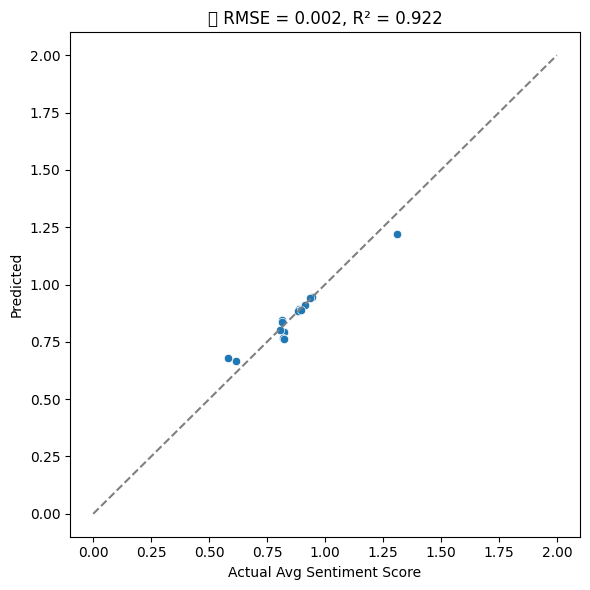

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

# === 3. 建立特徵與目標變數 ===
X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]

# === 4. 切分訓練/測試資料集 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 5. 建立並訓練隨機森林回歸模型 ===
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === 6. 預測與評估 ===
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"📈 RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()


In [2]:
model.score(X_test,y_test)

0.9216095154950086

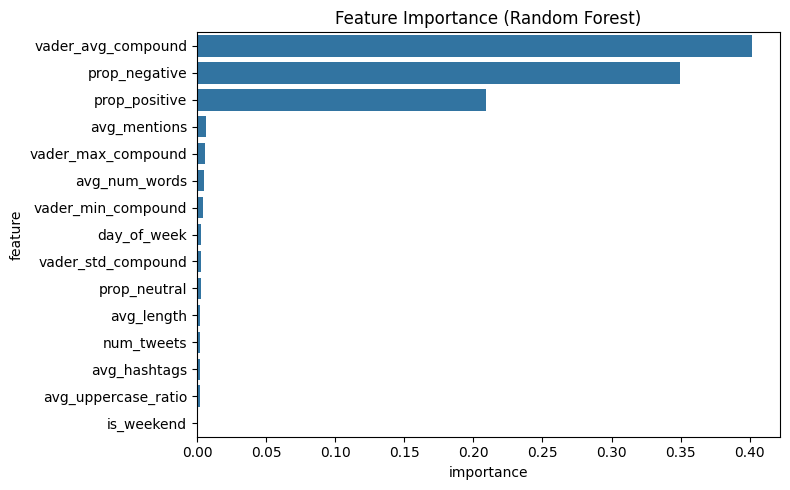

In [3]:
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df, x="importance", y="feature")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


/var/folders/xw/sscnc6jx4kb4klgrdr8sgyz80000gn/T/ipykernel_2321/3526538260.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eric1026/qiskit/miniconda3/envs/qiskit/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


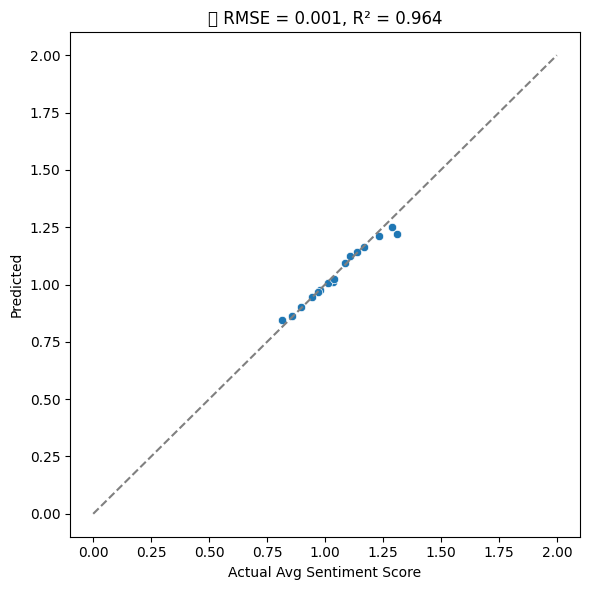

In [4]:
# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features_test.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

# === 3. 建立特徵與目標變數 ===
X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]
y_pred = model.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"📈 RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()

In [5]:
model.score(X,y)

0.9636463747378484

### Hyperparameter tuning

Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
📊 RMSE: 0.0018
📊 R²: 0.9238


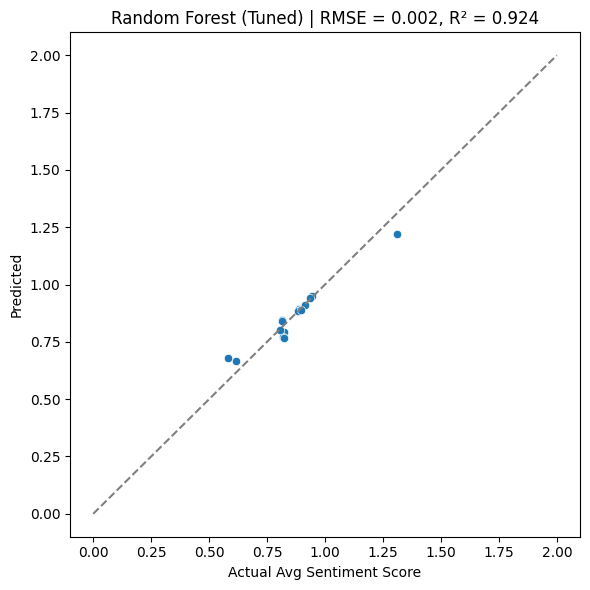

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入資料 ===
df = pd.read_csv("daily_sentiment_features.csv")
df = df.dropna()

X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]

# === 2. 切分資料集 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 3. 定義超參數搜尋範圍 ===
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# === 4. 建立 GridSearchCV ===
grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# === 5. 訓練模型 ===
grid.fit(X_train, y_train)

# === 6. 最佳模型與參數 ===
best_model = grid.best_estimator_
print(f"✅ Best Parameters: {grid.best_params_}")

# === 7. 預測與評估 ===
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 RMSE: {rmse:.4f}")
print(f"📊 R²: {r2:.4f}")

# === 8. 視覺化 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"Random Forest (Tuned) | RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()



/var/folders/xw/sscnc6jx4kb4klgrdr8sgyz80000gn/T/ipykernel_2321/2101939677.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eric1026/qiskit/miniconda3/envs/qiskit/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


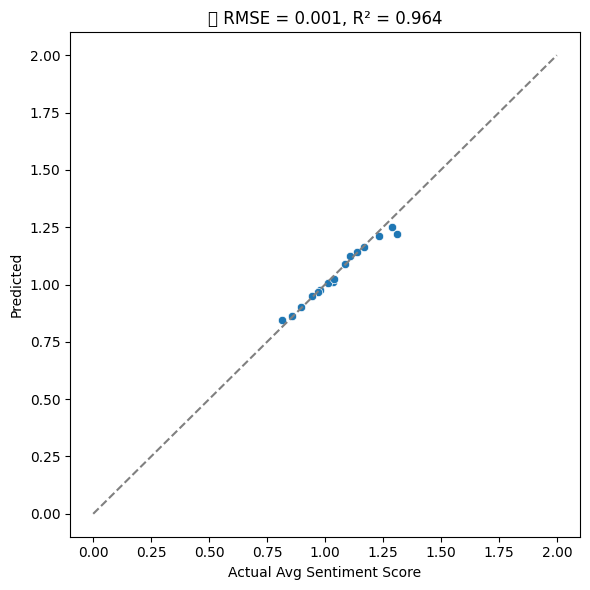

In [7]:
# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features_test.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

# === 3. 建立特徵與目標變數 ===
X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"📈 RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()

In [8]:
best_model.score(X,y)

0.9636919486792226

## Linear Regression

In [9]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入資料 ===
df = pd.read_csv("daily_sentiment_features.csv")
df = df.dropna()

X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]

# === 2. 切分訓練/測試集 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 3. GridSearchCV for Ridge Regression ===
ridge_grid = GridSearchCV(
    Ridge(),
    param_grid={'alpha': [0.01, 0.1, 1.0, 10, 100]},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
ridge_grid.fit(X_train, y_train)
ridge_model = ridge_grid.best_estimator_

# === 4. GridSearchCV for Lasso Regression ===
lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid={'alpha': [0.01, 0.1, 1.0, 10, 100]},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
lasso_grid.fit(X_train, y_train)
lasso_model = lasso_grid.best_estimator_

# === 5. 評估最佳模型 ===
for name, model in [("Ridge", ridge_model), ("Lasso", lasso_model)]:
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"🔎 {name} Regression")
    print(f"   ▸ Best alpha: {model.alpha}")
    print(f"   ▸ RMSE: {rmse:.4f}")
    print(f"   ▸ R²: {r2:.4f}")


🔎 Ridge Regression
   ▸ Best alpha: 0.01
   ▸ RMSE: 0.0001
   ▸ R²: 0.9968
🔎 Lasso Regression
   ▸ Best alpha: 0.1
   ▸ RMSE: 0.0262
   ▸ R²: -0.1273


/var/folders/xw/sscnc6jx4kb4klgrdr8sgyz80000gn/T/ipykernel_2321/190672221.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eric1026/qiskit/miniconda3/envs/qiskit/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


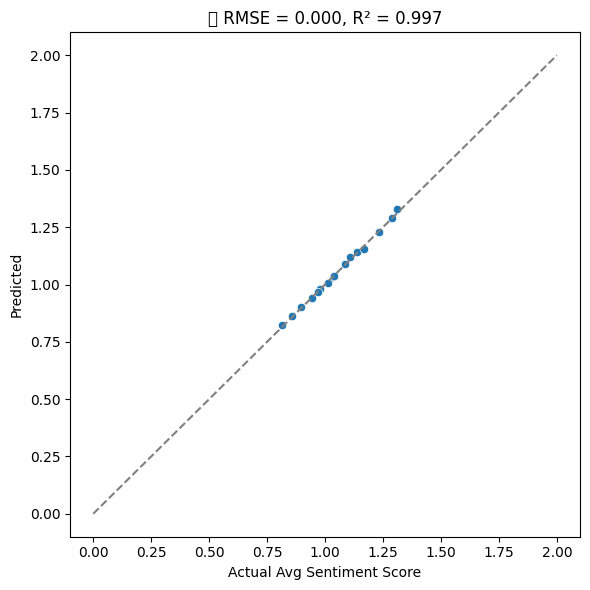

In [10]:
# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features_test.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

# === 3. 建立特徵與目標變數 ===
X = df.drop(columns=["date", "avg_sentiment_score"])
y = df["avg_sentiment_score"]
y_pred = ridge_model.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"📈 RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()

In [11]:
ridge_model.score(X,y)

0.9973750394448878

### Feature reduction

🔍 Top Important Features (Linear Model):
                Feature  Coefficient  Abs_Coefficient
8         prop_positive     0.836107         0.836107
6         prop_negative    -0.834886         0.834886
9    vader_avg_compound     0.258351         0.258351
4          avg_mentions     0.016482         0.016482
5   avg_uppercase_ratio     0.013724         0.013724
3          avg_hashtags    -0.008020         0.008020
10   vader_std_compound     0.005903         0.005903
12   vader_min_compound    -0.004036         0.004036
11   vader_max_compound     0.002469         0.002469
7          prop_neutral    -0.001221         0.001221


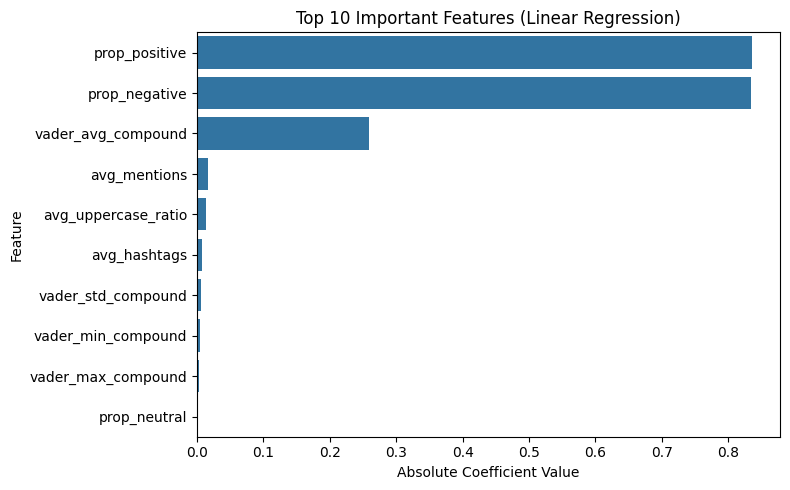

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
model = ridge_model

# 取得係數與特徵名稱
coefficients = model.coef_
feature_names = X.columns

# 整理成 DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

# 印出前幾名
print("🔍 Top Important Features (Linear Model):")
print(coef_df.head(10))

# 畫出 bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_df.head(10), x="Abs_Coefficient", y="Feature")
plt.title("Top 10 Important Features (Linear Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

✅ Best alpha: 0.01
📊 RMSE: 0.0001
📊 R²: 0.9976


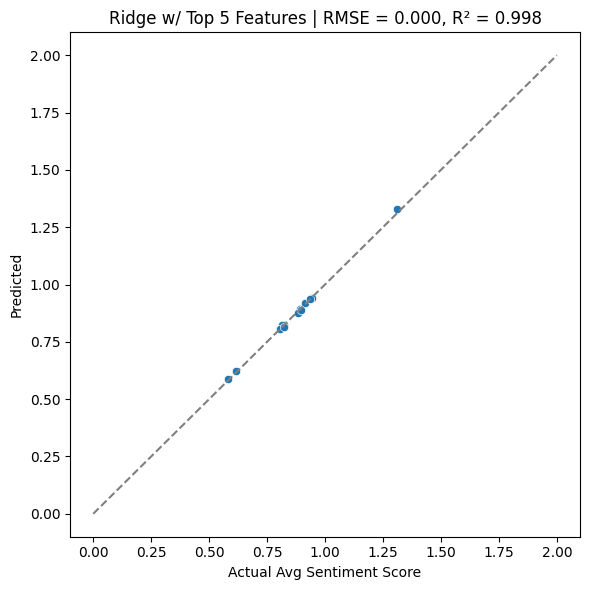

In [13]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. 載入資料並選取前 5 特徵 ===
df = pd.read_csv("daily_sentiment_features.csv")
df = df.dropna()

top5_features = ['prop_negative', 'vader_avg_compound', 'prop_positive', 'vader_std_compound', 'avg_mentions']
X = df[top5_features]
y = df["avg_sentiment_score"]

# === 2. 資料切分 ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 3. GridSearchCV for Ridge Regression ===
param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"✅ Best alpha: {best_model.alpha}")

# === 4. 預測與評估 ===
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 RMSE: {rmse:.4f}")
print(f"📊 R²: {r2:.4f}")

# === 5. 視覺化 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 2], [0, 2], linestyle='--', color='gray')
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"Ridge w/ Top 5 Features | RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.tight_layout()
plt.show()


/var/folders/xw/sscnc6jx4kb4klgrdr8sgyz80000gn/T/ipykernel_2321/1910125834.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eric1026/qiskit/miniconda3/envs/qiskit/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


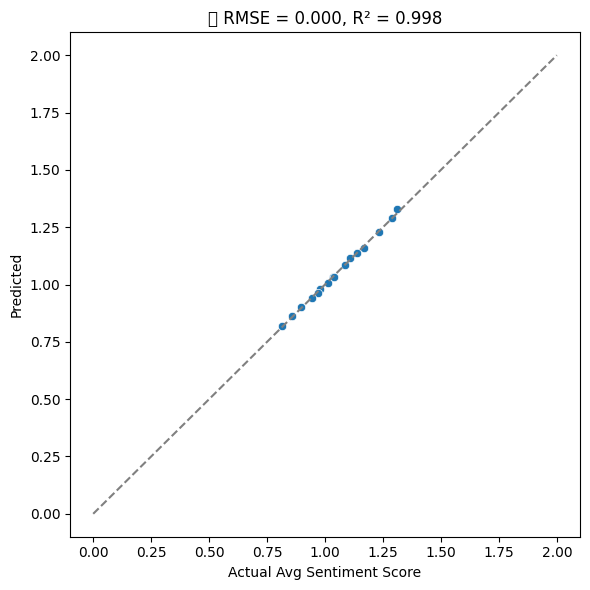

In [14]:
# === 1. 載入每日特徵資料 ===
df = pd.read_csv("daily_sentiment_features_test.csv")

# === 2. 移除缺失值（若有） ===
df = df.dropna()

# === 3. 建立特徵與目標變數 ===
X = df[top5_features]
y = df["avg_sentiment_score"]
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# === 7. 視覺化預測結果 ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Avg Sentiment Score")
plt.ylabel("Predicted")
plt.title(f"📈 RMSE = {rmse:.3f}, R² = {r2:.3f}")
plt.plot([0, 2], [0, 2], linestyle="--", color="gray")
plt.tight_layout()
plt.show()